## Series
- Column vector
- Index를 지정해줄 수 있다.(숫자, 문자 가능)
- numpy를 series가 warp 하고 있는 형태
    - np.ndarray의 subclass
- Series Name, Series index name 설정 가능

In [13]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
example_obj = Series()

C:\Users\shinw\AppData\Local\Temp\ipykernel_18992\3507266049.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  example_obj = Series()


List 로 생성

In [11]:
list_data = [i for i in range(10,15)]
list_name = ['a','b','c','d','e']
example = Series(data = list_data)
example2 = Series(data = list_data,index = list_name )
print(example)
#앞 column이 index 뒤 column이 value
print(example2)

0    10
1    11
2    12
3    13
4    14
dtype: int64
a    10
b    11
c    12
d    13
e    14
dtype: int64


#### Series.index
- index 반환

#### Series.values
- value 반환

In [18]:
# index에 접근
print(example.index)
print(example2.index)
print(example.values)
print(example2.values)

RangeIndex(start=0, stop=5, step=1)
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[10 11 12 13 14]
[10 11 12 13 14]


#### Series.Values 는 ndarray

In [23]:
type(example.values)

numpy.ndarray

Dict로 생성

In [14]:
dict_data = {"a":1,"b":2,"c":3,"d":4}
example3 = Series(dict_data,dtype = np.float32, name = "dict_gen_series")
example3

a    1.0
b    2.0
c    3.0
d    4.0
Name: dict_gen_series, dtype: float32

#### index로 데이터 접근
- 할당 가능

#### Series.astype(datatype)
- data type 변경 가능

In [26]:
example4 = example3.astype(int)
example4['a'] = 100
example4

a    100
b      2
c      3
d      4
Name: dict_gen_series, dtype: int32

#### Series는 index 기준으로 생성
- index를 data 수보다 많이 설정해주면 비어있는 공간 생성 (NaN 들어가있음)

In [27]:
example5 = Series(dict_data, index = ['a','b','c','d','e','f','g'])
example5

a    1.0
b    2.0
c    3.0
d    4.0
e    NaN
f    NaN
g    NaN
dtype: float64

# DataFrame
- Series를 모아서 만든 Data Table
- 보통 csv 파일을 불러와서 사용
- Numpy array-like
- Column 마다 다른 dtype 가질 수 있다
- size 변경 가능

#### Column 기준으로 생성
- 새로운 column 추가 시, NaN이 들어있는 column 생성

#### column 접근방법(Series 추출방법)
- `df.col_name`
    - attribute 처럼 접근
- `df["col_mame"]`
    - dict 처럼 col_name으로 접근

### column name 으로 indexing
- df[df["col_name"]="value"]
    - 특정 column의 특정 value의 데이터만 접근

### DataFrame Indexing
- `df.loc[a]` : index location. df 의 index 명으로 접근
    - index a에 해당하는 row를 column명과 함께 보여줌
    - `df.loc[index_list,column_list]`
    - index이름의 list, column 리스트로 접근
    - `df.loc[:index,:col_name]`
    <br><br>
- `df.iloc[i]` : index position. 설정된 index와 상관없이, 첫 row를 0으로 시작하여 순서로 접근
     - `df.iloc[row 순서 번호 list,column 순서 번호 list]`
     - row 순서의 번호 list, column 순서의 번호로 접근
     - `df.iloc[:i,:j]`

In [36]:
s = pd.Series(np.nan, index = [99,9,9,9,1,0,3])
s.loc[9:3]
# 앞에 뭐가 있던간에 index9부터 index 3 까지 출력

9   NaN
9   NaN
9   NaN
1   NaN
0   NaN
3   NaN
dtype: float64

In [32]:
s.iloc[0:3]
# 3번째 데이터 까지 출력

99   NaN
9    NaN
9    NaN
dtype: float64

- `df.loc[:,list]` : 콤마 뒤에는 column에 대한 indexing
    - column에 대한 indexing은 __list__로 받는다.

### DataFrame handling
- `df.age > 40`
    - age가 40보다 큰지에 대해 boolean으로 반환

#### df.values
- data 전부를 array로 출력

#### df.to_csv()
- csv로 변형 및 저장

## column 삭제
- df.drop("col_name", axis = 1)
    -  df에는 영향없다. drop 한 view만 보여줌
- def df.col_name
    - 메모리에서 col 삭제. df에서도 변경 일어남

### 보통은 axis 0 은 row 방향으로 함수 적용하고, axis 1 은 col 방향으로 함수를 적용하는데, Drop은 axis 0 기준 drop, 1기준 drop으로 이해하면 됨.

## Dict 로 DataFrame 생성
- 2중 Dict로 생성
    - 겉의 key는 column 명
    - 안의 key는 index 명
    - 안의 value 가 data가 됨
- jason file 이라거나

In [39]:
pop = {"Neo":{2001:1,2002:2.9},"Reo":{2000:1.1,2001:3,2002:4}}

DataFrame(pop)

,Neo,Reo
2001,1.0,3.0
2002,2.9,4.0
2000,NaN,1.1


## Select
- `df[list]`로 여러 column을 DataFrame 형태로 불러옴
- `df[list][:i]` list에 해당하는 column에서 i번째 데이터 가져옴

In [40]:
account_series = df['account']
account_series[account_series<50] # true인 경우만 불러온다

NameError: name 'df' is not defined

- `df.loc[index_list,column_list]`
    - index이름의 list, column 리스트로 접근

- `df.iloc[row 순서 번호 list,column 순서 번호 list]`
     - row 순서의 번호 list, column 순서의 번호로 접근
     - `df.iloc[:i,:j]`

 ### Index 재설정
 - df.index = index_list
 <br>
 
 - df.reset_index(inplace = True, drop = False)
     - 새로운 index가 생성되고 기존 index는 col_name index라는 column으로 생김
         - drop = True 일 경우 전 index 드랍
     - Default는 경우 df가 변경되지 않음
         - __inplace__ =True 이면 df가 변경됨!
     

### 데이터 삭제
- `df.drop(list,inplace=False, axis = 0)` 
    - axis = 0 $\rightarrow$ 한개 이상의 index로 drop
    - axis = 1 $\rightarrow$ 한개 이상의 col_name으로 drop
    - default 는 df는 변하지 않음. 
    - inplace =True 하면 df가 변경됨
    

# DataFrame operation
### Series operation
- index 기준으로 연산수행.
    - 연산 할, 같은 index 없으면 NaN값 반환
    - index 중복이 일어나면 각각 연산함

## DataFrame operation
- index, col_name 둘다 같아야 연산 수행. 연산할 상대 값이 없으면 NaN 반환
- df1.add(df2, fill_value = 0)
    - df1 + df2 수행하는 함수
    - 겹치지 않는 부분에 0을 더해주는 연산을 수행함. NaN 대신 기존 값 반환
        - df1.mul(df2, fill_value = 1) 연산 할 상대값 없는경우 기존값 반환
        
### Series 와 DataFrame의 연산
- 그냥 연산하게 되면, Series의 col_name이 없는이상 전부 NaN 반환.
- df.add(s1, axis = 0) 
    - axis 를 지정해주면 지정된 축을 따라 broadcasting 연산을 수행함.
    

## lambda, map, apply
### map for series
- series.map(func,inplace = False)
    - series의 data를 func에 넣은 값으로 치환한 series를 보여줌
    - inplace = True 해줘야 series의 값이 변경됨

In [43]:
s1 = Series(np.arange(10))
s2 = s1.map(lambda x : x**2)
s2

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64

In [46]:
# 객체를 통해 값 교체


z = {1:'A',3:'B',5:'C'}
s2 = Series(np.arange(10,20))

# dict의 key와 s1의 index가 같으면 해당 index의 data를 dict의 value로 대체,
# 없는 index는 NaN
s1_1 = s1.map(z)

# s1과 index가 같은 s2의 data로 대체
s1_2 = s1.map(s2)
print(s1_1)
print(s1_2)

0    NaN
1      A
2    NaN
3      B
4    NaN
5      C
6    NaN
7    NaN
8    NaN
9    NaN
dtype: object
0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int32


In [47]:
#example

# sex의 male 일 때  0 이고, female일 때 1인 sec_code라는 새로운 column 생성. 
df["sex_code"] = df.sex.map({'male': 0, 'female':1})

NameError: name 'df' is not defined

#### replace
- df.col_name.replace(dict)
    - col_name Data가 dict의 key 값일 경우 value로 치환해줌
    
- df.col_name.replace(Target_list,Conversion_list,inplace = True)
    - col_name Data 중에 Target_list를, Conversion_list로 치환함. 순서에 맞게.

## apply
- Series 전체(column)를 정의역으로 적용
    - #example
    - `f = lambda x: x.max() - x.min()
    df.apply(f)`
        - column별로 max값과 min값의 차이를 보여줌


In [48]:
# Series로 반환
def f(x):
    return Series([x.min(),x.max()],index=['min','max'])

# column 별로 min, max를 구한 값을 보여줌
df.apply(x)

NameError: name 'df' is not defined

### applymap
- map을 series가 아닌 df 전체에 적용할 때 사용
    - series에 적용해주면 map과 동일한 효과
- df의 모든 data에 적용
- df.applymap(f)
    - 모든 data가 f 적용된걸 보여줌

# pandas built-in function
- df.describe()
    - Numeric type data의 요약 정보 보여줌.
         - count, mean, max, min 등등

- df.col.unique()
    - col의 unique한 값들만 list로 보여줌

- df.isnull()
    - null 값의 여부를 boolean으로 반환
    - 이걸 sum해서 얼마나 null인지 알 수 있지

- df.sort_values(col_list,ascending =True)
    - col_list 기준으로 정렬

- corr,cov
    - df.age.corr(df.earn)
    - age와 earn의 corr
    - df.corr()
        
    
- corrwith
    - 한 column과 나머지 column의 corr 볼수있다.
    - df.corrwith(df.earn)
        - df.earn과 나머지의 corr 확인

df.dtypes
- df의 dtypes 볼수있다

In [ ]:
# 출력했을때 몇개나 보여줄지 설정핼 수 있따
pd.options.display.max_rows = int

#### df.col.value_counts(sort)
- col의 value마다 몇개인지 세줌
- df.col.value_counts(sort=True) / len(df)
    - 퍼센트로 볼 수 있음

 ## Groupby
 - `df.groupby(기준column_list)[적용할_col_name_list].연산()`
 - 연산: sum, mean,std 등등
 
 ### Hierarchical index
 
 #### Groupby를 두 기준을 적용할 경우 Hierarchical index
- h_index : index가 두개인 __series__

 #### Hierarchical_index.unstack()
    - h_index를 풀고 dataFrame으로 변경해줌
    - stack() 으로 다시 h_index로 변경
    
 #### h_index.reset_index()
     - 인덱스를 초기화 하고, 기존의 두 인덱스는 column화 시킴    
     
 #### h_index.swaplevel()
     - 두 index의 level을 서로 바꿔줌
 
 ### 정렬
 
 #### h_index.sortlevel(level=) , h_index.sort_index(level = )
     - index의 level 기준으로 정렬
     
 #### h_index.sort_values()
     - values 기준으로 sort

 ### Grouped
 
 - `grouped = df.groupby(기준col_name)
    for name, group in grouped :
    print(name,group)`
 - 기준 column의 value(name)에 따라 그룹화 하여 각각 DF객체로 받을 수 있다.
 - grouped 는 generator type
 
 #### grouped.get_group(그룹명)
     - 그룹명은 기준 col_name의 value
     - 해당 그룹만 가져올 수 있다.
 
 #### grouped.agg(연산_list)
     - Aggreation
     - 요약된 통계정보 추출가능
     - group별로 연산_list를 각각 수행.
      
 #### grouped.transform(func)
     - group별로 연산을 하며, element단위로 func 적용해줌
     - ex)<br>
      `score = lambda x:(x - x.mean()) / x.std()
       grouped.trandform(score)`
     - group별로, 각 element의 정규화를 한 값 도출 
     
 #### df.groupby(기준_col).filter(조건)
     - 조건을 만족하는 값만 groupby 된 상태로 추출
     - ex) <br>
          `df.groupby("Team").filter(lambda x : x["Point"].mean() >700)` <br>          group point의 평균이 700넘는 team만 보여줘


### DataFrame.transpose
dataframe.T

In [2]:
import pandas as pd

In [3]:
d1 = {'col1': [1, 2], 'col2': [3, 4]}
df1 = pd.DataFrame(data=d1)
df1
   

,col1,col2
0,1,3
1,2,4


In [4]:
df1_transposed = df1.T  # or df1.transpose()
df1_transposed

,0,1
col1,1,2
col2,3,4


# case study

In [10]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=8d30520be3e56974ed998164a1a3b47367a2c979516f918a925d148a02b1299d
  Stored in directory: c:\users\shinw\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [13]:
import wget
import pandas as pd

In [9]:
### data down load
url = "https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv"
wget.download(url)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)>

### read_csv(file, sep='\s+', header = None)
- \s+ 는 하나이상의 띄어쓰기의 정규식
    - 띄어쓰기들을 기준으로 데이터를 구분한다.
- header = None : column값을 불러오지 않는다.

In [11]:
df_phone = pd.read_csv("phone_data.csv")
df_phone.head(5)

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [12]:
#object -> string
# 현재 날짜가 str이다.
df_phone.dtypes

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [15]:
import dateutil
# dateutil.parser.parse
# 문자를 날자 형태로 바꿔줌
df_phone["date"] = df_phone["date"].apply(
                    dateutil.parser.parse, dayfirst=True)
df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [18]:
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [19]:
!conda install --y matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\shinw\anaconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39haa95532_0         923 KB
    ------------------------------------------------------------
                                           Total:         923 KB

The following packages will be UPDATED:

  conda                               4.10.3-py39haa95532_0 --> 4.13.0-py39haa95532_0




conda-4.13.0         | 923 KB    |            |   0% 
conda-4.13.0         | 923 KB    | 1          |   2% 
conda-4.13.0         | 923 KB    | ########## | 100% 
conda-4.13.0         | 923 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [28]:
#.plot()을 위해 import
import matplotlib

df_phone.groupby(["month","item"])["duration"].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: duration, dtype: int64

In [29]:
df_phone.groupby(["month","item"])["duration"].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


<AxesSubplot:xlabel='month'>

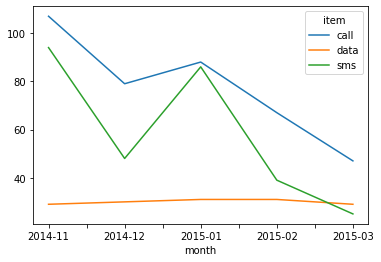

In [30]:
df_phone.groupby(["month","item"])["duration"].count().unstack().plot()

### agg 에 dict 활용해서 함수적용
- df.groupby(기준_list,as_index = True).agg({col_1:함수1,col_2:함수2,col3:함수3})
    - 함수를 str으로 넣어주자
    - 함수를 list로 넣어서 다양한 함수를 적용 가능
- as_index는 Default true. 
    - 기준 column을 index로 한다
    - False하면 index는 초기화, 기준 column은 column으로 들어감

In [33]:
df_phone.groupby("month",as_index=False).agg({"duration":"sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [35]:
# first: column에 첫번째로 나오는 data 보여줌
df_phone.groupby("month",as_index=False).agg({"duration":"sum","network_type": "count","date":"first"})

,month,duration,network_type,date
0,2014-11,26639.441,230,2014-10-15 06:58:00
1,2014-12,14641.870,157,2014-11-13 06:58:00
2,2015-01,18223.299,205,2014-12-13 06:58:00
3,2015-02,15522.299,137,2015-01-13 06:58:00
4,2015-03,22750.441,101,2015-02-12 20:15:00


In [46]:
# nunique : unique값 계산
df_phone.groupby("month",as_index=True).agg({"duration":[min,max],
                                              "network_type": ["count",sum],
                                              "date":["first","nunique"]})

duration          network_type  \
             min      max        count   
month                                    
2014-11      1.0   1940.0          230   
2014-12      1.0   2120.0          157   
2015-01      1.0   1859.0          205   
2015-02      1.0   1863.0          137   
2015-03      1.0  10528.0          101   

                                                            \
                                                       sum   
month                                                        
2014-11  datamobilemobilemobilemobilemobiledatamobilemo...   
2014-12  datadatavoicemailmobiledatadatamobiledatadatam...   
2015-01  datadatadatamobilemobilemobilemobilemobilemobi...   
2015-02  datadatadatamobilespecialmobiledatamobilemobil...   
2015-03  landlinemobiledatamobilemobiledatamobilemobile...   

                       date          
                      first nunique  
month                                
2014-11 2014-10-15 06:58:00     210  
2014-12 2014-11-13 06:58:00     147  
2015-01 2014-12-13 06:58:00     172  
2015-02 2015-01-13 06:58:00     125  
2015-03 2015-02-12 20:15:00      93

In [51]:
# column droplevel
# 2중 column을 level별로 드랍함
mixed = df_phone.groupby("month",as_index=True).agg({"duration":[min,max],
                                              "network_type": ["count",sum],
                                              "date":["first","nunique"]})
# h_col인 column들 중에 level1을 다 없앰
mixed.columns = mixed.columns.droplevel(level = 1)
mixed

,duration,duration,network_type,network_type,date,date
month,,,,,,
2014-11,1.0,1940.0,230,datamobilemobilemobilemobilemobiledatamobilemo...,2014-10-15 06:58:00,210
2014-12,1.0,2120.0,157,datadatavoicemailmobiledatadatamobiledatadatam...,2014-11-13 06:58:00,147
2015-01,1.0,1859.0,205,datadatadatamobilemobilemobilemobilemobilemobi...,2014-12-13 06:58:00,172
2015-02,1.0,1863.0,137,datadatadatamobilespecialmobiledatamobilemobil...,2015-01-13 06:58:00,125
2015-03,1.0,10528.0,101,landlinemobiledatamobilemobiledatamobilemobile...,2015-02-12 20:15:00,93


####  Rename
- df.rename(columns = {'target1':'new1','target2':'new2','target3':'new3'})
    - target col_name을 new_col name으로 바꿔줌

- df.add_prefix("prefix_")
    - prefix_colname 으로 col name 앞에 prefix 붙여줌
    

## Pivot Table
- Groupby 후, 특정 col1 의 value를, Col2의 Value 별로 연산을 적용하여 볼 수 있다.
- 즉, col2 의 value 에 따른, col1 value의 통계정보를 볼 수 있다.
- `df.pivot_table(["col1"],
index = [df.groupby기준_col1,df.groupby기준_col2],
columns = df.col2, aggfunc = "연산", fill_value = 0)`
    - 값이 없으면 NaN 반환되므로, 없는 값에 fill_value = 0 해줌

In [53]:
df_phone.pivot_table(["duration"], # 보고싶은 value
                     # 묶을 기준
                     index = [df_phone.month,df_phone.item], 
                     # value의 구분 
                     columns = df_phone.network, aggfunc = "sum", fill_value = 0)


duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

In [54]:
# groupby로 같은 거 보기.
df_phone.groupby(["month","item","network"])["duration"].sum().unstack()

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0

# Merge & Concat
## Merge
- 기준col 기준으로 두 DataFrame을 합친다.
- pd.merge(df_a,df_b, left_on="df_a_col_name", right_on ="df_b_col_name")
- pd.merge(df_a,df_b, on="기준 col_name", how = join방식 )
    - 기본적으로는 how: inner
    - how: inner, outer,right, left
### index 기준 merge
- pd.merge(df_a,df_b, right_index= True, left_index = True)
    - index 기준으로 같은 부분 join
    - 동일한 col_name이 있으면 '_x','_y' 붙는다.
    - 할당해줘야함
    

## Concat
- DataFrame을 붙임. axis 에 따라 붙이는 위치 다름 
    - axis = 0 이면 위아래, axis =1 이면 옆에 붙임
- `df_new = pd.concat([합칠 dataframe_list], axis = 0)`
    - 합칠 dataframe을 리스트로 넣어줌
    - .reset_index() 해서 index 초기화
- `df_new.append(df_3)`
    - 새로 더 붙임

In [6]:
import os
# os.listdir : 경로
# 그 경로 안에 파일이름을 list에 저장함.
files = [file_name
        for file_name in os.listdir(".") if file_name.endswith("ipynb")] 
files

['concurrent.futures 활용 비동기 작업.ipynb',
 'Coroutine.ipynb',
 'Decorator.ipynb',
 'Exception.ipynb',
 'File 다루기os, pathlib, pickle.ipynb',
 'Iterator and Generator and itertools.ipynb',
 'MARKDOWN.ipynb',
 'Modules and Projects.ipynb',
 'Numpy.ipynb',
 'Often used Functions.ipynb',
 'Often used Lib.ipynb',
 'Often used List.ipynb',
 'Often used Methods.ipynb',
 'Often used string.ipynb',
 'OOP(Object Oriented Programming).ipynb',
 'Pandas.ipynb',
 'Python GIL.ipynb',
 'Random.ipynb',
 '매개변수.ipynb',
 '상식.ipynb']

In [9]:
 # 데이터를 한번에 list로 불러 올 수 있다.
import pandas as pd
# 예시일 뿐 실행안됨. files가 ibynb 파일이라 read_excel로 못 읽음
df_list = [pd.read_excel(
            os.path.join("data",files_name)) for files_name in files]
# df_list[0]에 각각 엑셀파일1 df_list[1]에 엑셀파일2, 이런식으로 들어감.
df_list

['data\\concurrent.futures 활용 비동기 작업.ipynb',
 'data\\Coroutine.ipynb',
 'data\\Decorator.ipynb',
 'data\\Exception.ipynb',
 'data\\File 다루기os, pathlib, pickle.ipynb',
 'data\\Iterator and Generator and itertools.ipynb',
 'data\\MARKDOWN.ipynb',
 'data\\Modules and Projects.ipynb',
 'data\\Numpy.ipynb',
 'data\\Often used Functions.ipynb',
 'data\\Often used Lib.ipynb',
 'data\\Often used List.ipynb',
 'data\\Often used Methods.ipynb',
 'data\\Often used string.ipynb',
 'data\\OOP(Object Oriented Programming).ipynb',
 'data\\Pandas.ipynb',
 'data\\Python GIL.ipynb',
 'data\\Random.ipynb',
 'data\\매개변수.ipynb',
 'data\\상식.ipynb']

## Database connection


In [ ]:
import sqlite3
pd.read_sql_querry

### ExcelWriter
- pd 활용해 excel 파일 생성
- conda install XlsxWriter
- conda install openpyxl
- 둘중에 하나 설치해야함

In [ ]:
writer = pd.ExcelWriter("./file.excel", engine = "xlsxwriter")
df.to_excel(writer, sheet_name = "Sheet1")


### Pickle 저장

In [ ]:
df.to_pickle("./file.pickle")


In [ ]:
df_pickle = pd.read_pickle("./file.pickle")
df_picke.head()